# MNIST Data - Sequential API
- This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.
- https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import itertools 
import numpy as np
import pandas as pd

In [2]:
# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.15.0


## Data

In [3]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train.astype(np.float32) / 255.0, X_test.astype(np.float32)/ 255.0

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [5]:
# The y data is already shuffled so we do not need to do it again.
print(y_train[0:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


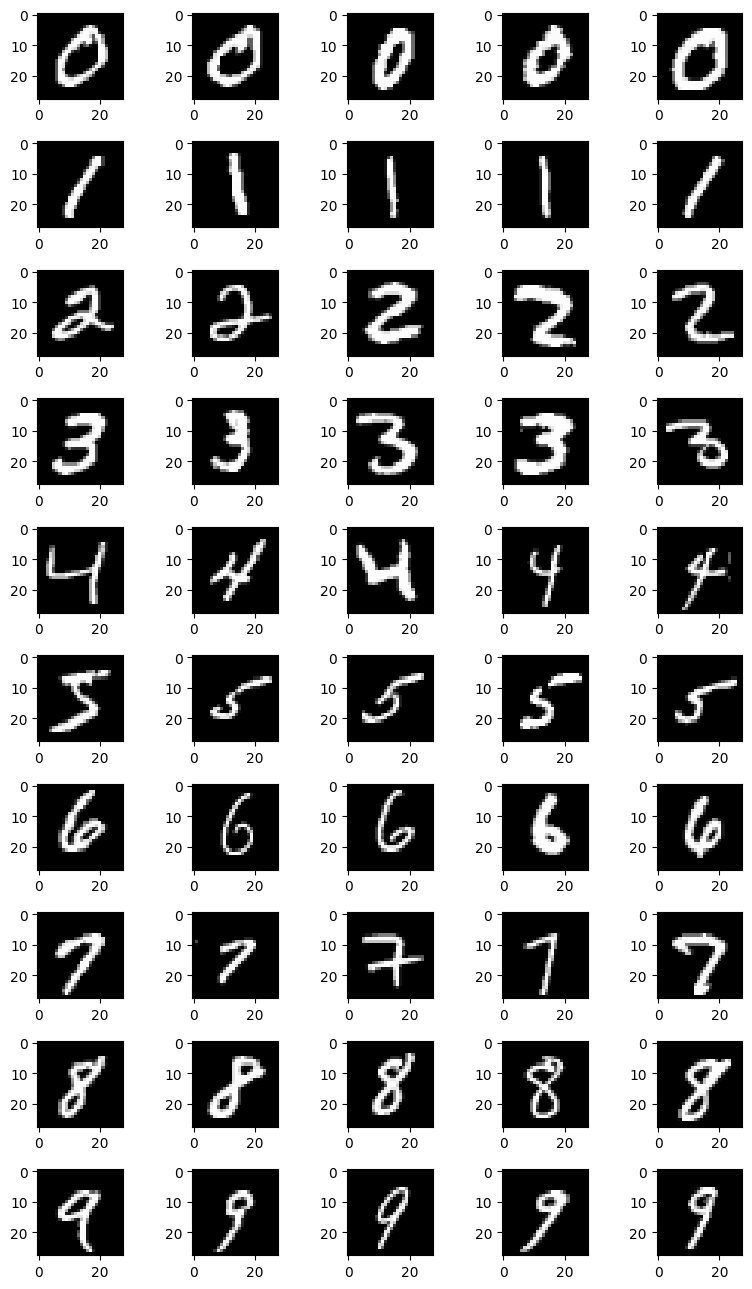

In [6]:
fig, axes = plt.subplots(10,5, figsize=(8,13))
for num in range(10):
    x_plot = X_train[y_train==num]
    for idx in range(np.array(axes).shape[1]):
        axes[num][idx].imshow(x_plot[idx], cmap='gray')
fig.tight_layout()
plt.show()

## Model building
- Build the `tf.keras.Sequential` model by stacking layers. Choose an optimizer and loss function for training:

In [7]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(28,28)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', name='hidden1'),
  tf.keras.layers.Dense(10, activation='softmax', name='output')
])

## Compile model
- Prepare for fitting

In [8]:
model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 128)               100480    
                                                                 
 output (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training (Fitting)

In [10]:
tf_fit = model.fit(X_train, y_train, validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20


1688/1688 [==============================] - 3s 2ms/step - loss: 0.2748 - accuracy: 0.9216 - val_loss: 0.1198 - val_accuracy: 0.9652
Epoch 2/20
1688/1688 [==============================] - 3s 1ms/step - loss: 0.1200 - accuracy: 0.9638 - val_loss: 0.0893 - val_accuracy: 0.9722
Epoch 3/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0822 - accuracy: 0.9754 - val_loss: 0.0767 - val_accuracy: 0.9762
Epoch 4/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0612 - accuracy: 0.9818 - val_loss: 0.0708 - val_accuracy: 0.9782
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0474 - accuracy: 0.9856 - val_loss: 0.0672 - val_accuracy: 0.9780
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0654 - val_accuracy: 0.9812
Epoch 7/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9911 - val_loss: 0.0690 - val_accurac

In [11]:
# Inspect the training history
df = pd.DataFrame(tf_fit.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.274806,0.921593,0.119836,0.965167
1,0.120048,0.963815,0.089336,0.972167
2,0.082188,0.975426,0.076694,0.976167
3,0.061189,0.981778,0.070834,0.978167
4,0.047408,0.985574,0.067196,0.978000


<Axes: title={'center': 'Loss'}, xlabel='Epoch', ylabel='Loss'>

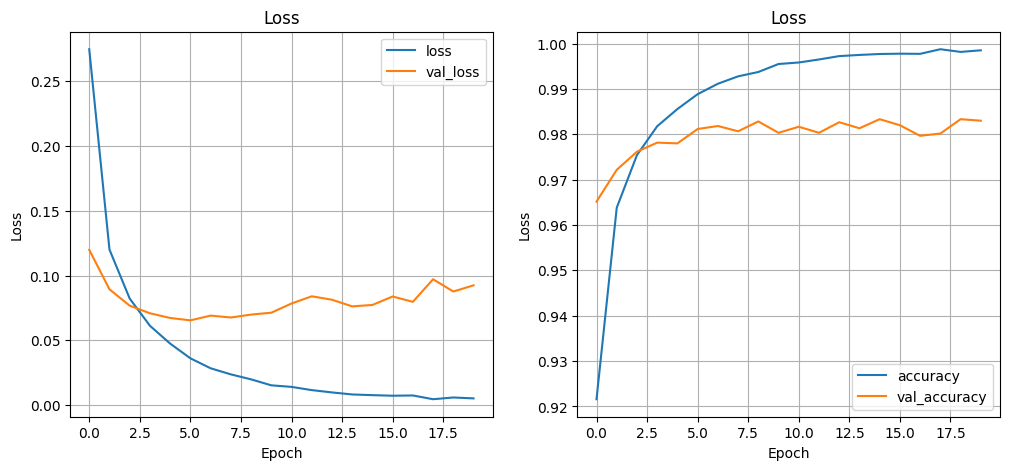

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

df[["loss", "val_loss"]].plot(
    ax=axes[0], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

df[["accuracy", "val_accuracy"]].plot(
    ax=axes[1], title="Loss", grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)

## Evaluation
- The `Model.evaluate` method checks the models performance.

In [13]:
model.evaluate(X_test,  y_test)

313/313 [==============================] - 0s 986us/step - loss: 0.0963 - accuracy: 0.9813


[0.09632989764213562, 0.9812999963760376]

In [14]:
y_hat = model(X_test)
print(y_hat.shape)
print(y_hat.numpy()[:2])

(10000, 10)
[[1.6843489e-12 2.0700556e-11 1.6174330e-12 3.1441026e-08 1.5301289e-19
  1.1320819e-14 4.0578399e-21 1.0000000e+00 1.7288122e-10 9.5407913e-09]
 [1.3306929e-19 4.8452687e-12 1.0000000e+00 3.9328800e-14 2.4177801e-32
  2.3705611e-19 9.0653381e-19 2.0537977e-26 3.3682079e-14 5.0448355e-25]]


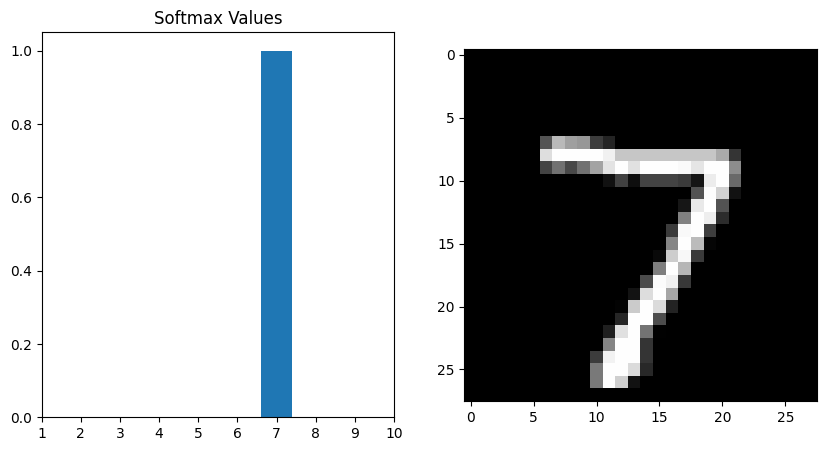

In [15]:
x_ticklabel = [i + 1 for i in range(10)]
fig, axes = plt.subplots(1,2, figsize=(10,5))
yp = y_hat.numpy()[0]
xp = list(range(yp.shape[0]))
axes[0].bar(xp, yp)
axes[0].set_title('Softmax Values')
axes[0].set_xticks(x_ticklabel)
axes[0].set_xticklabels(x_ticklabel)
axes[0].set_xlim([1,10])
axes[1].imshow(X_test[0], cmap='gray')
plt.show()

In [16]:
# Find misclassification
y_pred_tf = model(X_test)
y_pred_tf.numpy().shape

y_pred = tf.math.argmax(y_pred_tf,axis=1).numpy()
print(y_pred.shape)
print(y_test.shape)

loc = y_pred != y_test
print(f'Missclassification = {loc.sum()}')

(10000,)
(10000,)
Missclassification = 187


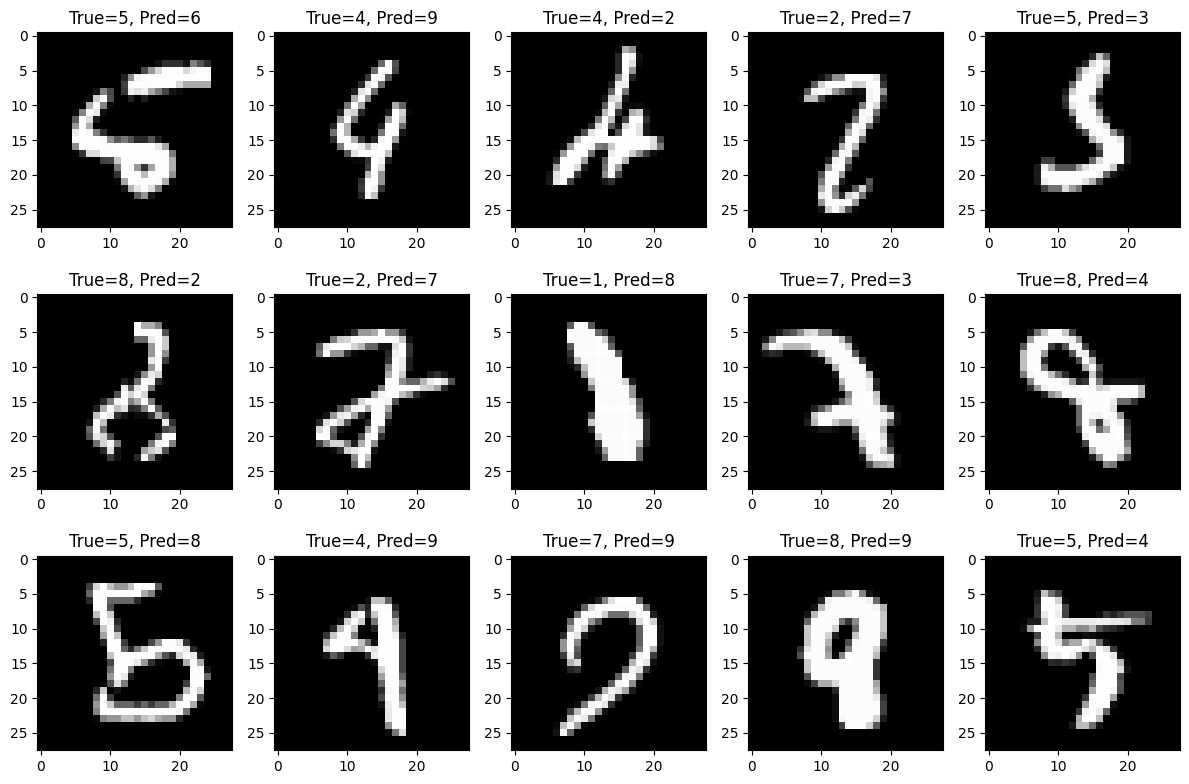

In [17]:
fig, axes2D = plt.subplots(3,5, figsize=(12,8))
axes = list(itertools.chain.from_iterable(axes2D)) # Flatten 2D list
X_test_miss = X_test[loc]
y_test_miss = y_test[loc]
y_pred_miss = y_pred[loc]
for idx, ax in enumerate(axes):
    ax.imshow(X_test_miss[idx], cmap='gray')
    ax.set_title(f'True={y_test_miss[idx]}, Pred={y_pred_miss[idx]}')
fig.tight_layout()
plt.show()